<a href="https://colab.research.google.com/github/SheeNigami/plushie_classifier/blob/master/Android_Plushie_Classifier_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## **Model 1: Basic CNN Classifier**


In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [0]:
batch_size = 16
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory='./drive/My Drive/images/train',
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory='./drive/My Drive/images/test',
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 163 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [0]:
sample_training_images, _ = next(train_data_gen)

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

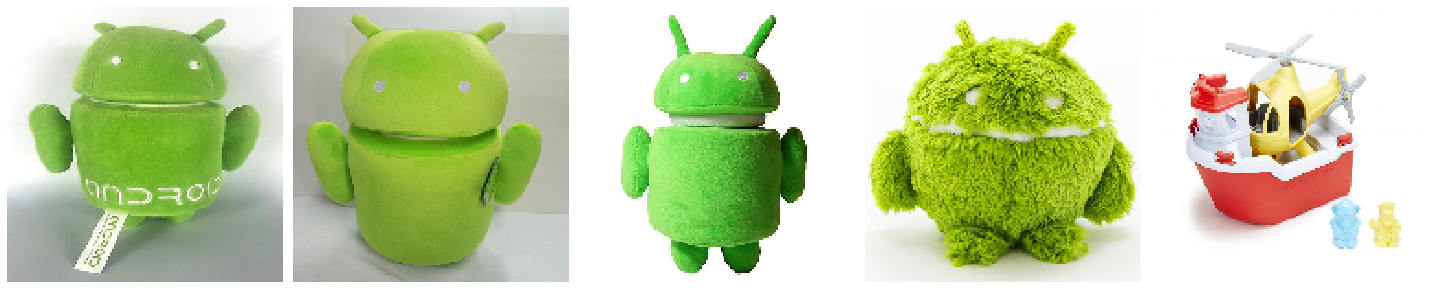

In [0]:
plotImages(sample_training_images[:5])

In [0]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [0]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=163 // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=42 // batch_size
)

Epoch 1/15
10/10 [==============================] - 98s 10s/step - loss: 1.4616 - acc: 0.4626 - val_loss: 0.6826 - val_acc: 0.7500
Epoch 2/15
10/10 [==============================] - 2s 219ms/step - loss: 0.6195 - acc: 0.6259 - val_loss: 0.7602 - val_acc: 0.5000
Epoch 3/15
10/10 [==============================] - 2s 225ms/step - loss: 0.5517 - acc: 0.7188 - val_loss: 0.5645 - val_acc: 0.6875
Epoch 4/15
10/10 [==============================] - 2s 213ms/step - loss: 0.4001 - acc: 0.7959 - val_loss: 0.5938 - val_acc: 0.7188
Epoch 5/15
10/10 [==============================] - 2s 180ms/step - loss: 0.3413 - acc: 0.8433 - val_loss: 0.6510 - val_acc: 0.7500
Epoch 6/15
10/10 [==============================] - 2s 197ms/step - loss: 0.1772 - acc: 0.9250 - val_loss: 1.1635 - val_acc: 0.6250
Epoch 7/15
10/10 [==============================] - 2s 196ms/step - loss: 0.1950 - acc: 0.9456 - val_loss: 0.7643 - val_acc: 0.7812
Epoch 8/15
10/10 [==============================] - 2s 194ms/step - loss: 0.0

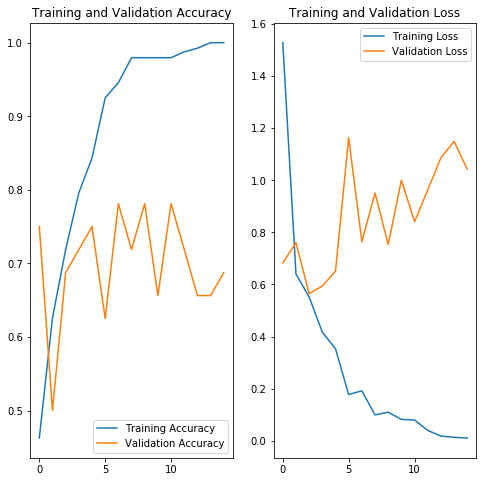

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## **Model 2: Dropout, Image Augmentation**

In [0]:
train_image_generator_augmented = ImageDataGenerator(rescale=1./255,
                                          rotation_range=45,
                                          width_shift_range=.15,
                                          height_shift_range=.15,
                                          horizontal_flip=True,
                                          zoom_range=0.5) # Generator for our training data

In [52]:
train_data_gen_aug = train_image_generator_augmented.flow_from_directory(batch_size=batch_size,
                                                     directory='./drive/My Drive/images/train',
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

val_data_gen_aug = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory='./drive/My Drive/images/test',
                                                              shuffle=True,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 163 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [0]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [60]:
model_new.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)       

In [61]:
history_augmented = model_new.fit_generator(
    train_data_gen_aug,
    steps_per_epoch=163 // batch_size,
    epochs=epochs*2,
    validation_data=val_data_gen_aug,
    validation_steps=42 // batch_size
)

Epoch 1/30
10/10 [==============================] - 3s 267ms/step - loss: 0.9322 - acc: 0.5238 - val_loss: 0.6430 - val_acc: 0.6562
Epoch 2/30
10/10 [==============================] - 2s 216ms/step - loss: 0.6217 - acc: 0.6599 - val_loss: 0.6948 - val_acc: 0.7500
Epoch 3/30
10/10 [==============================] - 2s 240ms/step - loss: 0.5126 - acc: 0.7483 - val_loss: 1.0950 - val_acc: 0.5312
Epoch 4/30
10/10 [==============================] - 2s 248ms/step - loss: 0.5152 - acc: 0.7812 - val_loss: 0.7587 - val_acc: 0.7812
Epoch 5/30
10/10 [==============================] - 2s 235ms/step - loss: 0.4131 - acc: 0.7959 - val_loss: 0.5280 - val_acc: 0.7500
Epoch 6/30
10/10 [==============================] - 2s 211ms/step - loss: 0.4787 - acc: 0.8299 - val_loss: 0.6464 - val_acc: 0.7812
Epoch 7/30
10/10 [==============================] - 2s 243ms/step - loss: 0.4521 - acc: 0.7823 - val_loss: 0.5983 - val_acc: 0.8438
Epoch 8/30
10/10 [==============================] - 2s 223ms/step - loss: 0.

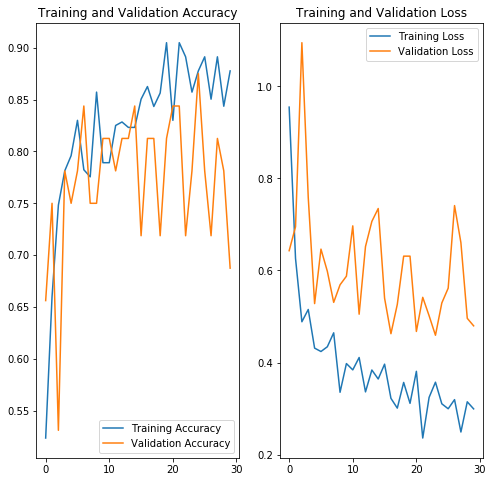

In [64]:
acc = history_augmented.history['acc']
val_acc = history_augmented.history['val_acc']

loss = history_augmented.history['loss']
val_loss = history_augmented.history['val_loss']

epochs_range = range(epochs * 2)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
model_new.save('./drive/My Drive/aug_plushie_classifier.h5')

## **Model 3: tfhub ImageNet Transfer Learning**

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pylab as plt

try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly
except Exception:
  pass
import tensorflow as tf

In [0]:
!pip install -U tf-hub-nightly
import tensorflow_hub as hub

from tensorflow.keras import layers

     |████████████████████████████████| 102kB 3.9MB/s 


In [0]:
feature_extractor_url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2'
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"

IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
])

feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(224,224,3))

In [38]:
train_data_gen_aug_tl = train_image_generator_augmented.flow_from_directory(batch_size=batch_size,
                                                     directory='./drive/My Drive/images/train',
                                                     shuffle=True,
                                                     target_size=IMAGE_SHAPE,
                                                     class_mode='binary')

val_data_gen_aug_tl = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory='./drive/My Drive/images/test',
                                                              shuffle=True,
                                                              target_size=IMAGE_SHAPE,
                                                              class_mode='binary')

Found 163 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [0]:
feature_extractor_layer.trainable = False

In [40]:
model = tf.keras.Sequential([
  feature_extractor_layer,
  layers.Dense(train_data_gen_aug.num_classes, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []

  def on_train_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['acc'])
    self.model.reset_metrics()

In [0]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='sparse_categorical_crossentropy',
  metrics=['acc'])

In [45]:
steps_per_epoch = np.ceil(train_data_gen_aug_tl.samples/train_data_gen_aug_tl.batch_size)

batch_stats_callback = CollectBatchStats()

history = model.fit_generator(train_data_gen_aug_tl, epochs=20,
                              validation_data=val_data_gen_aug_tl,
                              steps_per_epoch=steps_per_epoch)

Epoch 1/20
11/11 [==============================] - 4s 350ms/step - loss: 0.2616 - acc: 0.9080 - val_loss: 0.3786 - val_acc: 0.8095
Epoch 2/20
11/11 [==============================] - 3s 302ms/step - loss: 0.2139 - acc: 0.9080 - val_loss: 0.3711 - val_acc: 0.8095
Epoch 3/20
11/11 [==============================] - 3s 316ms/step - loss: 0.1615 - acc: 0.9387 - val_loss: 0.3997 - val_acc: 0.8333
Epoch 4/20
11/11 [==============================] - 3s 305ms/step - loss: 0.1474 - acc: 0.9571 - val_loss: 0.3881 - val_acc: 0.8333
Epoch 5/20
11/11 [==============================] - 3s 310ms/step - loss: 0.1416 - acc: 0.9509 - val_loss: 0.3843 - val_acc: 0.8333
Epoch 6/20
11/11 [==============================] - 3s 306ms/step - loss: 0.1278 - acc: 0.9571 - val_loss: 0.3716 - val_acc: 0.8333
Epoch 7/20
11/11 [==============================] - 3s 303ms/step - loss: 0.1087 - acc: 0.9816 - val_loss: 0.3755 - val_acc: 0.8333
Epoch 8/20
11/11 [==============================] - 3s 297ms/step - loss: 0.

## **Results:**

Here are the best recorded results for each model:

Model 1 (Basic CNN): 78%

Model 2 (Basic CNN + Image Augmentation + Dropout): 81%

Model 3 (tfhub ImageNet Transfer Learning): 88%

### Export Model:

Since Model 3 produces the best results, let's export Model 3.

In [56]:
# Save Model
# model.save_weights('./drive/My Drive/plushie_classifier.h5')

model.save('./drive/My Drive/plushie_classifier_tl.h5')

ValueError: ignored

In [50]:
# Convert to tensorflowlite

converter = tf.lite.TFLiteConverter.from_keras_model_file('./drive/My Drive/plushie_classifier_sm.h5',custom_objects={'KerasLayer':hub.KerasLayer})
tfmodel = converter.convert()
file = open( 'model.tflite' , 'wb' ) 
file.write( tfmodel )

Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'list' object has no attribute 'name'


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'list' object has no attribute 'name'


INFO:tensorflow:Froze 262 variables.


INFO:tensorflow:Froze 262 variables.


INFO:tensorflow:Converted 262 variables to const ops.


INFO:tensorflow:Converted 262 variables to const ops.


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'list' object has no attribute 'name'


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'list' object has no attribute 'name'


ConverterError: ignored

Due to problems with converting the tfhub transfer learning model (Model 3) to tflite format, we will use model 2 instead.

In [63]:
# Convert to tensorflowlite

converter = tf.lite.TFLiteConverter.from_keras_model_file('./drive/My Drive/aug_plushie_classifier.h5')
tfmodel = converter.convert()
file = open( 'plushie_classifier_aug.tflite' , 'wb' ) 
file.write( tfmodel )

INFO:tensorflow:Froze 10 variables.


INFO:tensorflow:Froze 10 variables.


INFO:tensorflow:Converted 10 variables to const ops.


INFO:tensorflow:Converted 10 variables to const ops.


42568440